In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
!pip install -Uqq fastai duckduckgo_search

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
from fastdownload import download_url
# search and save
def search_and_save(term):
    dest = f'{term}.jpg'
    urls = search_images(term)
    download_url(urls[0], dest, show_progress=False)
    return dest

Searching for 'forest'


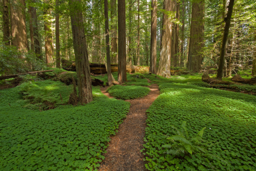

In [6]:
term = 'forest'
dest = search_and_save(term)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'tree'


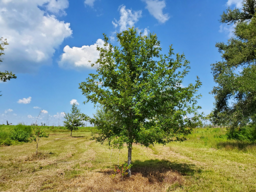

In [7]:
term = 'tree'
dest = search_and_save(term)
im = Image.open(dest)
im.to_thumb(256,256)

In [14]:
searches = 'forest', 'single tree'
path = Path('forest_tree')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'single tree photo'
Searching for 'single tree sun photo'
Searching for 'single tree shade photo'


In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

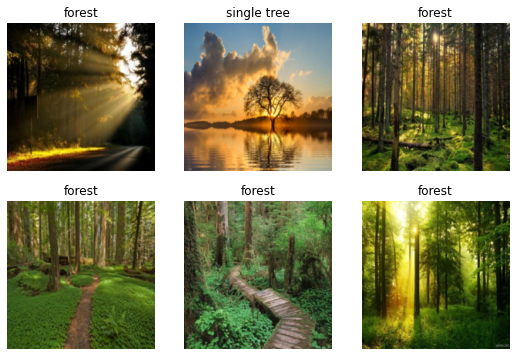

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(9)

epoch,train_loss,valid_loss,error_rate,time
0,1.416034,0.286740,0.088235,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.441638,0.196168,0.058824,00:01
1,0.370469,0.117795,0.029412,00:01
2,0.265827,0.097836,0.029412,00:01
3,0.205244,0.110727,0.029412,00:01
4,0.163945,0.117101,0.029412,00:01
5,0.133872,0.107807,0.058824,00:01
6,0.114917,0.101459,0.029412,00:01
7,0.097088,0.096256,0.029412,00:01
8,0.082834,0.100671,0.029412,00:01


In [22]:
is_art,_,probs = learn.predict(PILImage.create('tree.jpg'))

print(f"This is a: {is_art}.")
print(f"Probability it's tree: {probs[1]:.4f}")


This is a: single tree.
Probability it's tree: 0.9974
